In [1]:
import sys, os

folder_path = '../models/'
if folder_path not in sys.path:
    sys.path.append(folder_path)

from cnmp import CNMP
from cnep import CNEP

import numpy as np
import torch
from movement_primitives.promp import ProMP
from movement_primitives.dmp import DMP
from gmr import GMM
import matplotlib.pyplot as plt

In [2]:
root_path = '/home/yigit/projects/cnep/outputs/'
test_path = 'ablation/sines_4/orig_0_1_2_cnmp/1717661842/'

data_path = root_path + test_path + 'y.pt'

Y = torch.load(data_path, map_location='cpu').to('cpu').numpy().squeeze(-1)
x = np.linspace(0, 1, Y.shape[1])
print(f'x: {x.shape}, Y: {Y.shape}')

num_modes = 4
num_demos = Y.shape[0]
num_indiv = Y.shape[0]//num_modes
t_steps = Y.shape[1]

y_min, y_max = np.min(Y), np.max(Y)

Y_means = np.zeros((num_modes,Y.shape[1]))
for i in range(num_modes):
    Y_means[i] = np.mean(Y[i*num_indiv:(i+1)*num_indiv], axis=0)

x: (200,), Y: (128, 200)


In [3]:
num_tests = 50

xs = np.array([[0.24623116],
 [0.45226131],
 [0.08542714],
 [0.69346734],
 [0.29145729],
 [0.61306533],
 [0.18090452],
 [0.69849246],
 [0.26633166],
 [0.3718593 ],
 [0.66834171],
 [0.47738693],
 [0.58291457],
 [0.36683417],
 [0.31658291],
 [0.64824121],
 [0.49748744],
 [0.08040201],
 [0.62311558],
 [0.28140704],
 [0.35175879],
 [0.5678392 ],
 [0.05527638],
 [0.71356784],
 [0.26130653],
 [0.04020101],
 [0.73366834],
 [0.57788945],
 [0.10552764],
 [0.20603015],
 [0.27135678],
 [0.63316583],
 [0.72361809],
 [0.09045226],
 [0.36180905],
 [0.64321608],
 [0.6281407 ],
 [0.18592965],
 [0.67839196],
 [0.28643216],
 [0.74371859],
 [0.72864322],
 [0.46231156],
 [0.30150754],
 [0.48743719],
 [0.06030151],
 [0.11557789],
 [0.03015075],
 [0.29648241],
 [0.44723618]])

ys = np.array([[0.56180744],
 [0.34824384],
 [0.01],
 [0.01],
 [0.96339294],
 [0.26148386],
 [0.91971259],
 [0.01],
 [0.60230055],
 [0.99],
 [0.01],
 [0.13947339],
 [0.0711953 ],
 [0.79871233],
 [0.94769003],
 [0.01],
 [0.10734631],
 [0.01],
 [0.29750059],
 [0.75971957],
 [0.99],
 [0.31462026],
 [0.09137786],
 [0.01],
 [0.5447564 ],
 [0.01],
 [0.09261984],
 [0.13615855],
 [0.22023899],
 [0.72607579],
 [0.6929993 ],
 [0.01],
 [0.05684143],
 [0.1989063 ],
 [0.83341571],
 [0.18423026],
 [0.23312547],
 [0.9204998 ],
 [0.01],
 [0.67663135],
 [0.01],
 [0.25892983],
 [0.32853354],
 [0.99],
 [0.06062631],
 [0.16004875],
 [0.26569024],
 [0.1892691 ],
 [0.74640606],
 [0.50949359]])
indices = np.array([49,90,17,138,58,122,36,139,53,74,133,95,116,73,63,129,99,16,124,56,70,
                    113,11,142,52,8,146,115,21,41,54,126,144,18,72,128,125,37,135,57,148,
                    145,92,60,97,12,23,6,59,89])

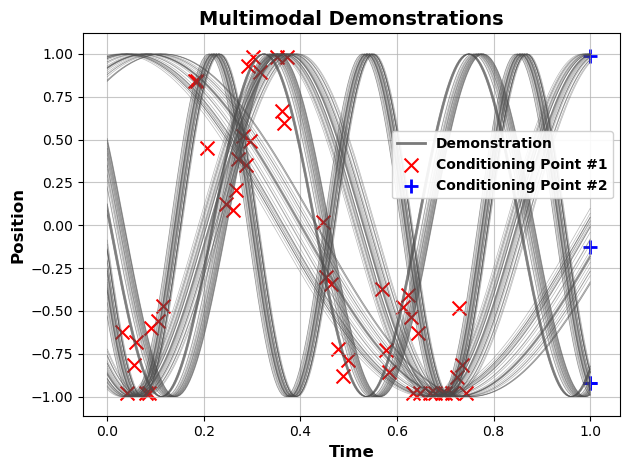

In [4]:
from matplotlib.lines import Line2D

# map Y into -1, 1
Y_norm = 2*(Y-y_min)/(y_max-y_min) - 1
# map ys into -1, 1
ys_norm = 2*(ys-y_min)/(y_max-y_min) - 1
# also Y_means
Y_means_norm = 2*(Y_means-y_min)/(y_max-y_min) - 1

dark_gray = '#4d4d4d'
for i in range(Y.shape[0]):
    plt.plot(x, Y_norm[i], color=dark_gray, alpha=0.4, linewidth=0.5)


for i in range(len(indices)):
    lbl = ''
    if i == 0:
        lbl = 'Conditioning Point #1'
    plt.scatter(xs[i], ys_norm[i], color='red', marker='x', s=100, label=lbl)

for i in range(Y_means_norm.shape[0]):
    lbl = ''
    if i == 0:
        lbl = 'Conditioning Point #2'
    plt.scatter(1, Y_means_norm[i, -1], color='blue', marker='+', s=100, label=lbl, edgecolor='black', linewidth=2)



plt.title('Multimodal Demonstrations', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Position', fontsize=12, fontweight='bold')

handles = [Line2D([0], [0], color=dark_gray, lw=2, alpha=0.75, label='Demonstration')] + plt.gca().get_legend_handles_labels()[0]

# plt.ylim(y_min-0.05, y_max+0.05)
plt.legend(handles=handles, fontsize=12, loc='lower right', bbox_to_anchor=(1, 0.55), frameon=True, framealpha=0.9, prop=dict(weight='bold'))
plt.grid(alpha=0.7)
plt.tight_layout()
plt.savefig(f'plots/multimodal_demonstration.svg', format='svg', dpi=300)
plt.show()

In [5]:
# import numpy as np
# import os

# save_path = 'data/synthetic/sines_4'

# if not os.path.exists(save_path):
#     os.makedirs(save_path)
# try:
#     os.makedirs(f'{save_path}_0')
#     os.makedirs(f'{save_path}_1')
#     os.makedirs(f'{save_path}_2')
#     os.makedirs(f'{save_path}_3')
# except:
#     pass

# num_demos = Y.shape[0]
# t_steps = Y.shape[1]
# num_classes = num_modes

# for i in range(num_demos):
#     traj = np.zeros((1, t_steps, 2))
#     traj[0, :, 0] = x.copy()
#     traj[0, :, 1] = Y[i, :].copy()
        
#     np.save(f'{save_path}_{i//num_indiv}/{i%num_indiv}.npy', traj)

In [6]:
def find_closest_traj_ind(traj, cut=0):
    # find the closest trajectory in the dataset
    min_dist = np.inf
    min_ind = -1
    traj = traj[:-cut] if cut != 0 else traj
    traj_length = traj.shape[0]
    for i, y in enumerate(Y):
        if cut != 0:
            dist = compute_euclidean_dist(y[-traj_length-cut:-cut], traj)  # euclidean distance between two trajectories
        else:
            dist = compute_euclidean_dist(y, traj)
        if dist < min_dist:
            min_dist = dist
            min_ind = i
    return min_ind, min_dist


def compute_euclidean_dist(traj0, traj1):
    traj_length = traj0.shape[np.argmax(traj0.shape)]
    assert traj_length > 10, f"Trajectory length is too short: {traj_length}"
    
    traj0 = traj0.reshape(traj_length)
    traj1 = traj1.reshape(traj_length)

    dist = np.sum(np.sqrt((traj0 - traj1) ** 2))
    coeff = t_steps/traj_length
    return dist * coeff

In [7]:
model_folder = 'saved_models/'
models_path = f'{root_path}{test_path}{model_folder}'

m_path, m0_path, m1_path, m2_path, m3_path = f'{models_path}org.pt', f'{models_path}abl0.pt', f'{models_path}abl1.pt', f'{models_path}abl2.pt', f'{models_path}cnmp.pt'

batch_size = 1
dx, dy = 1, 1
n_max, m_max = 10, 10
t_steps = Y.shape[1]
device = 'cpu'

cnmp = CNMP(dx, dy, n_max, m_max, [204,204], decoder_hidden_dims=[204,204], batch_size=batch_size, device=device)
cnep = CNEP(dx, dy, n_max, m_max, [128,128], num_decoders=4, decoder_hidden_dims=[128, 128], batch_size=batch_size, scale_coefs=True, device=device)
cnep0 = CNEP(dx, dy, n_max, m_max, [128,128], num_decoders=4, decoder_hidden_dims=[128, 128], batch_size=batch_size, scale_coefs=True, device=device)
cnep1 = CNEP(dx, dy, n_max, m_max, [128,128], num_decoders=4, decoder_hidden_dims=[128, 128], batch_size=batch_size, scale_coefs=True, device=device)
cnep2 = CNEP(dx, dy, n_max, m_max, [128,128], num_decoders=4, decoder_hidden_dims=[128, 128], batch_size=batch_size, scale_coefs=True, device=device)

cnep.load_state_dict(torch.load(m_path, map_location='cpu'))
cnep0.load_state_dict(torch.load(m0_path, map_location='cpu'))
cnep1.load_state_dict(torch.load(m1_path, map_location='cpu'))
cnep2.load_state_dict(torch.load(m2_path, map_location='cpu'))
cnmp.load_state_dict(torch.load(m3_path, map_location='cpu'))


# data for testing cnxp
val_obs = torch.zeros((batch_size, n_max, dx+dy), dtype=torch.float32, device=device)
val_tar_x = torch.zeros((batch_size, t_steps, dx), dtype=torch.float32, device=device)
# val_tar_y = torch.zeros((batch_size, t_steps, dy), dtype=torch.float32, device=device)
val_obs_mask = torch.zeros((batch_size, n_max), dtype=torch.bool, device=device)

val_obs.fill_(0)
val_tar_x.fill_(0)
val_obs_mask.fill_(False)

val_obs_mask[0, :2] = True

val_tar_x[0] = torch.linspace(0, 1, t_steps).unsqueeze(1)

In [8]:
def random_points_on_demo(n):
    rand_x = np.zeros((n, 1))
    rand_y = np.zeros((n, 1))
    for i in range(n):
        rand_ind = np.random.randint(0, t_steps)
        rand_x[i] = x[rand_ind]
        rand_y[i] = Y[np.random.randint(0, num_demos)][rand_ind]
    
    return rand_x, rand_y

def intersection_points_on_demo(n):
    rand_points = np.zeros((n, 2))
    indices = np.zeros(n)

    found = 0
    while found < n:
        rand_ind = np.random.randint(0, t_steps-50) # to avoid the end of the trajectory
        for i in range(num_modes):
            for j in range(num_modes):
                if i==j:
                    continue
                elif np.abs(Y_means[i][rand_ind] - Y_means[j][rand_ind]) < 0.1:
                    if rand_ind in indices:
                        continue
                    else:
                        rand_points[found, 0] = x[rand_ind]
                        rand_points[found, 1] = np.random.uniform(Y_means[i][rand_ind], Y_means[j][rand_ind])
                        indices[found] = rand_ind
                        found += 1

    return rand_points[:, 0].reshape(-1, 1), rand_points[:, 1].reshape(-1, 1), indices.astype(int)

In [9]:
# plt.plot(x, Y.T, color='gray', alpha=0.1)
# for i in range(len(indices)):
#     plt.scatter(xs[i], ys[i], color='red', marker='x')
# plt.legend()
# plt.grid()
# plt.show()

In [10]:
import pickle

with open('rand_multimodal_smp_5_types.pkl', 'rb') as f:
    smp_trajs = pickle.load(f)

In [15]:
p_ = ProMP(n_dims=1, n_weights_per_dim=8)
p_.imitate(np.tile(x, (num_demos, 1)), Y)

n_components = 6  # Number of GMM components
gmr_model_ = GMM(n_components=n_components, random_state=1234)
gmr_model_.from_samples(Y)

In [20]:
from tqdm import tqdm
import copy

import seaborn as sns
from matplotlib.lines import Line2D


colors = [sns.color_palette('tab10')[8], sns.color_palette('tab10')[3], 
          sns.color_palette('tab10')[0], sns.color_palette('tab10')[4], 
          sns.color_palette('tab10')[1]]

linestyles = [(0, (3, 1, 1, 1, 1, 1)), '--', ':', '-.', '-']

y1s = Y_means[:, -1]

num_models = 9
# 1: ProMP, 2: GMR, 3: CNMP, 4: StableMP, 5:CNEP, 6: CNEP-MoE, 7: CNEP-A0, 8: CNEP-A1, 9: CNEP-A2

euc_errors = np.zeros((num_modes*num_tests, num_models))

plot_id = -1

for i1 in range(num_modes):
    for i0 in tqdm(range(num_tests)):
        plot_id = i0

        p = copy.deepcopy(p_)
        gmr_model = copy.deepcopy(gmr_model_)        

        x0 = xs[i0]
        y0 = ys[i0]
        y1 = y1s[i1]

        # ProMP
        p = p.condition_position(y0, t=x0).condition_position(y1, t=1)
        trajectory_p = p.sample_trajectories(x, 1, np.random.RandomState(seed=1234))

        # GMR
        gmr_model = gmr_model.condition([indices[i0], -1], [y0[0], y1])
        trajectory_g = gmr_model.sample(1)
        trajectory_g = np.insert(trajectory_g, indices[i0], y0[0])
        trajectory_g = np.append(trajectory_g, y1)

        # CNMP and CNEP
        val_obs[0, :2, :dx] = torch.tensor([x0[0], 1]).unsqueeze(1)
        val_obs[0, :2, dx:] = torch.tensor([y0[0], y1]).unsqueeze(1)

        with torch.no_grad():
            trajectory_cnmp = cnmp.val(val_obs, val_tar_x, val_obs_mask)[:, :, :dy]
            pred_cnep, gate = cnep.val(val_obs, val_tar_x, val_obs_mask)
            dec_id = torch.argmax(gate.squeeze(1), dim=-1)
            trajectory_cnep = pred_cnep[dec_id, 0, :, :dy]

            confs = gate.view(4, 1, 1, 1)
            preds = pred_cnep[:, :, :, :dy]

            weighted_preds = preds * confs  # Element-wise multiplication, shape (num_gates, 1, 200, 1)
            trajectory_cnep_moe = weighted_preds.sum(dim=0, keepdim=True)  # Sum along the first dimension, shape (1, 1, 200, 1)

            pred_cnep0, gate0 = cnep0.val(val_obs, val_tar_x, val_obs_mask)
            dec_id0 = torch.argmax(gate0.squeeze(1), dim=-1)
            trajectory_cnep0 = pred_cnep0[dec_id0, 0, :, :dy]

            pred_cnep1, gate1 = cnep1.val(val_obs, val_tar_x, val_obs_mask)
            dec_id1 = torch.argmax(gate1.squeeze(1), dim=-1)
            trajectory_cnep1 = pred_cnep1[dec_id1, 0, :, :dy]

            pred_cnep2, gate2 = cnep2.val(val_obs, val_tar_x, val_obs_mask)
            dec_id2 = torch.argmax(gate2.squeeze(1), dim=-1)
            trajectory_cnep2 = pred_cnep2[dec_id2, 0, :, :dy]

        for j in range(num_models):
            if j == 0:
                traj = trajectory_p.squeeze(0)
                if i0 == plot_id:
                    # map to -1, 1
                    traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                    plt.plot(x, traj_map, color=colors[j], label='ProMP', linewidth=2.5, linestyle=linestyles[j])
            elif j == 1:
                traj = trajectory_g
                if i0 == plot_id:
                    # map to -1, 1
                    traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                    plt.plot(x, traj_map, color=colors[j], label='GMM-GMR', linewidth=2.5, linestyle=linestyles[j])
            elif j == 2:
                traj = trajectory_cnmp.squeeze(0).squeeze(-1).numpy()
                if i0 == plot_id:
                    # map to -1, 1
                    traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                    plt.plot(x, traj_map, color=colors[j], label='CNMP', linewidth=2.5, linestyle=linestyles[j])
            elif j == 3:  # offline test
                traj = smp_trajs[i1*num_tests+i0]
                if i0 == plot_id:
                    # map to -1, 1
                    traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                    plt.plot(x[indices[i0]:], traj_map, color=colors[j], label='Stable MP', linewidth=2.5, linestyle=linestyles[j])
            elif j == 4:
                traj = trajectory_cnep.squeeze(0).squeeze(-1).numpy()
                if i0 == plot_id:
                    # map to -1, 1
                    traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                    plt.plot(x, traj_map, color=colors[j], label='CNEP', linewidth=2.5, linestyle=linestyles[j])
            elif j == 5:
                traj = trajectory_cnep_moe.squeeze(0).squeeze(0).squeeze(-1).numpy()
            elif j == 6:
                traj = trajectory_cnep0.squeeze(0).squeeze(-1).numpy()
            elif j == 7:
                traj = trajectory_cnep1.squeeze(0).squeeze(-1).numpy()
            elif j == 8:
                traj = trajectory_cnep2.squeeze(0).squeeze(-1).numpy()

            cut = 0
            if j == 3:
                cut = 2

            closest_traj_ind, closest_dist = find_closest_traj_ind(traj, cut)
            euc_errors[i1*num_tests+i0, j] = closest_dist / t_steps

        if i0 == plot_id:
            # map y0, y1 to -1, 1
            y0_map = 2*(y0-y_min)/(y_max-y_min) - 1
            y1_map = 2*(y1-y_min)/(y_max-y_min) - 1

            plt.title('Trajectory Generation', fontsize=14, fontweight='bold')
            plt.xlabel('Time', fontsize=12, fontweight='bold')
            plt.ylabel('Position', fontsize=12, fontweight='bold')
            plt.plot(x, Y_norm.T, color='gray', alpha=0.06)
            plt.scatter(x0, y0_map, color='black', marker='*', s=100, label='Conditioning Point', zorder=10)
            plt.scatter(1, y1_map, color='black', marker='*', s=100, zorder=10)

            handles = [Line2D([0], [0], color=dark_gray, lw=2, alpha=0.5, label='Demonstration')] + plt.gca().get_legend_handles_labels()[0]

            plt.legend(handles=handles, fontsize=12, loc='best', frameon=True, framealpha=0.9, prop=dict(weight='bold'))
            plt.grid(alpha=0.7)
            plt.tight_layout()
            plt.ylim(-1.1, 1.1)
            plt.savefig(f'plots/multi_out/multimodal_comparison_{i0}_{i1}.svg', format='svg', dpi=300)
            plt.clf()

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:19<00:00,  2.55it/s]


<Figure size 640x480 with 0 Axes>

In [21]:
# print mean errors and standard deviations
# print('RMSE')
# print(np.mean(rmse_errors, axis=0))
# print(np.std(rmse_errors, axis=0))
# print('MAE')
# print(np.mean(mae_errors, axis=0))
# print(np.std(mae_errors, axis=0))
# print('Max error')
# print(np.mean(max_errors, axis=0))
# print(np.std(max_errors, axis=0))
print('Euc error')
print(np.mean(euc_errors, axis=0))
print(np.std(euc_errors, axis=0))

Euc error
[0.18074787 0.33232498 0.11165072 0.05759347 0.02652366 0.03306253
 0.1223782  0.04366633 0.05276979]
[0.0665155  1.34656469 0.07380848 0.0712244  0.04164365 0.04577809
 0.086553   0.06162304 0.06193028]


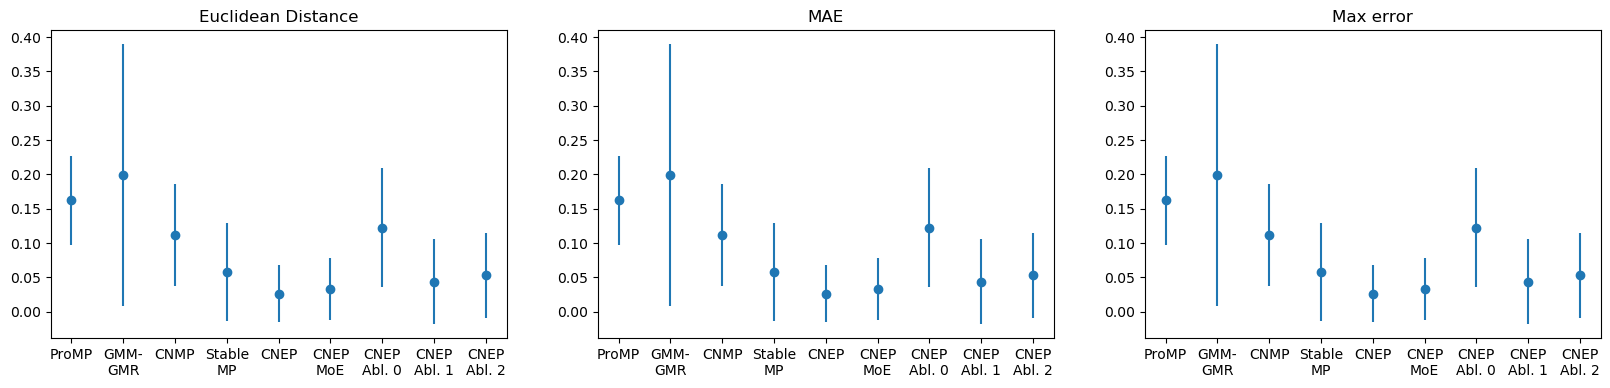

In [ ]:
# plot mean errors and standard deviations 
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
x_labels = ['ProMP', 'GMM-\nGMR', 'CNMP', 'Stable\nMP', 'CNEP', 'CNEP\nMoE', 'CNEP\nAbl. 0', 'CNEP\nAbl. 1', 'CNEP\nAbl. 2']
ax[0].errorbar(x_labels, np.mean(euc_errors, axis=0), np.std(euc_errors, axis=0), fmt='o')
ax[0].set_title('Euclidean Distance')
ax[1].errorbar(x_labels, np.mean(euc_errors, axis=0), np.std(euc_errors, axis=0), fmt='o')
ax[1].set_title('MAE')
ax[2].errorbar(x_labels, np.mean(euc_errors, axis=0), np.std(euc_errors, axis=0), fmt='o')
ax[2].set_title('Max error')
plt.show()
# plt.savefig('table4_0.png')


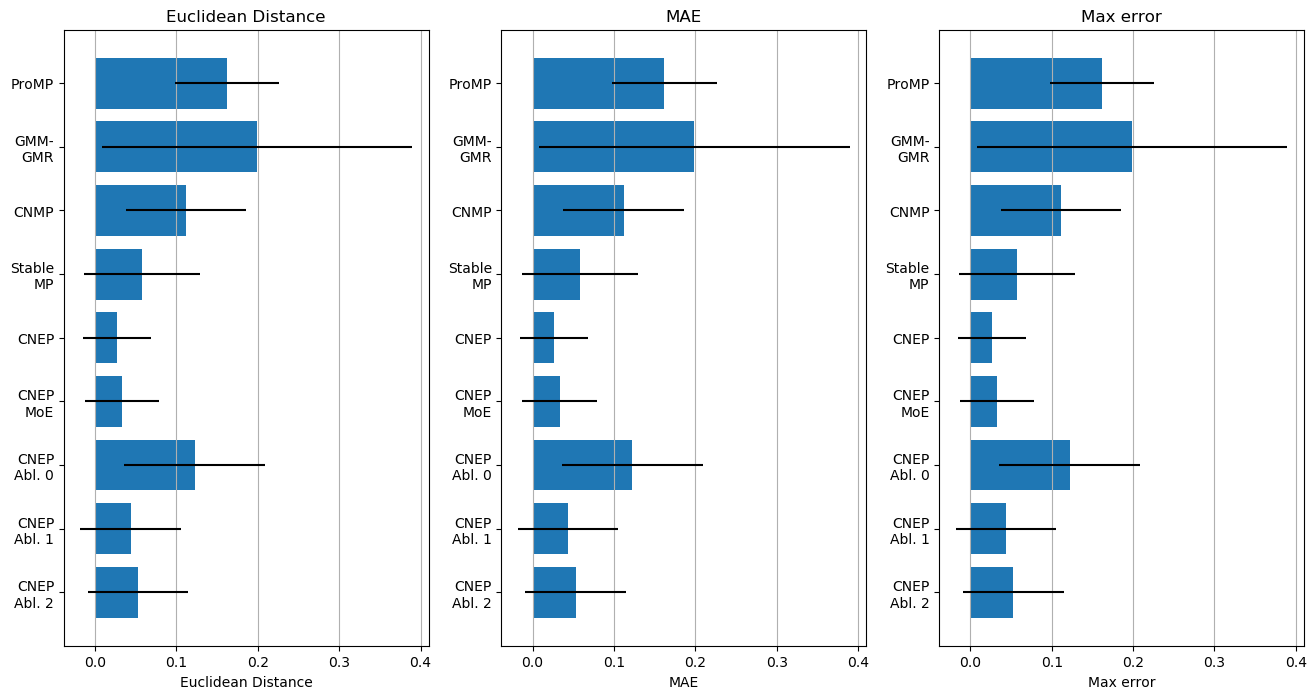

In [ ]:
# plot mean errors and standard deviations as horizontal bars
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
y_pos = np.arange(len(x_labels))
ax[0].barh(y_pos, np.mean(euc_errors, axis=0), xerr=np.std(euc_errors, axis=0), align='center')
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(x_labels)
ax[0].invert_yaxis()
ax[0].set_xlabel('Euclidean Distance')
ax[0].set_title('Euclidean Distance')
ax[1].barh(y_pos, np.mean(euc_errors, axis=0), xerr=np.std(euc_errors, axis=0), align='center')
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(x_labels)
ax[1].invert_yaxis()
ax[1].set_xlabel('MAE')
ax[1].set_title('MAE')
ax[2].barh(y_pos, np.mean(euc_errors, axis=0), xerr=np.std(euc_errors, axis=0), align='center')
ax[2].set_yticks(y_pos)
ax[2].set_yticklabels(x_labels)
ax[2].invert_yaxis()
ax[2].set_xlabel('Max error')
ax[2].set_title('Max error')

ax[0].grid(axis='x')
ax[1].grid(axis='x')
ax[2].grid(axis='x')
plt.show()
# plt.savefig('table4_1.png')